In [42]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('Wine dataset.csv', header = None, usecols = [0,1,2])
df.columns = ['class', 'alcohol', 'malicacid']

In [50]:
df.head(10)

,class,alcohol,malicacid
0,class,Alcohol,Malic acid
1,1,14.23,1.71
2,1,13.2,1.78
3,1,13.16,2.36
4,1,14.37,1.95
5,1,13.24,2.59
6,1,14.2,1.76
7,1,14.39,1.87
8,1,14.06,2.15
9,1,14.83,1.64


In [51]:
df = df.drop(index = 0, axis = 0)

C:\Users\abhay\AppData\Local\Temp\ipykernel_4436\3251807700.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['alcohol'], hist = False, color = 'red')


<Axes: xlabel='alcohol', ylabel='Density'>

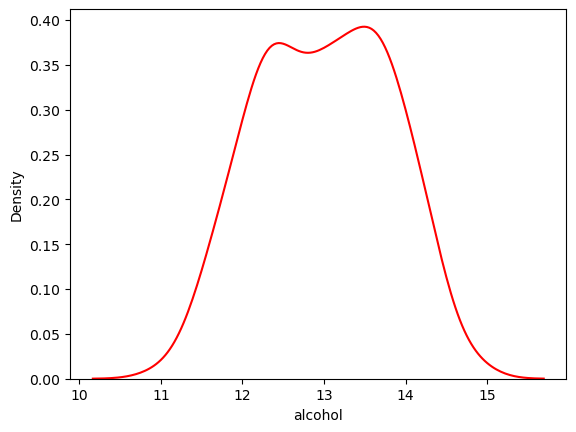

In [65]:
sns.distplot(df['alcohol'], hist = False, color = 'red')

<Axes: xlabel='alcohol', ylabel='malicacid'>

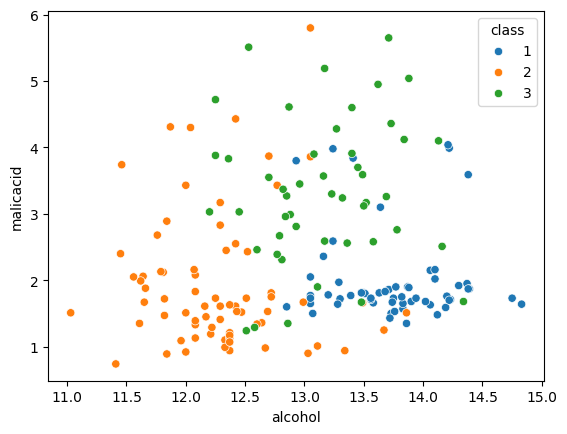

In [55]:
df['malicacid'] = df['malicacid'].astype(float)
df['alcohol'] = df['alcohol'].astype(float)
sns.scatterplot(x = df['alcohol'], y = df['malicacid'], hue = df['class'])

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler() ## object created of the class minmaxscaler..
X,x,Y,y = train_test_split(df.drop('class', axis = 1), df['class'], test_size = 0.3, random_state = 0)


X.shape, x.shape

((124, 2), (54, 2))

In [58]:
scaler.fit(X)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [59]:
X_scaled = scaler.transform(X)
x_scaled = scaler.transform(x)

In [61]:
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
x_scaled = pd.DataFrame(x_scaled, columns = x.columns)

In [62]:
X_scaled.sample(5)

,alcohol,malicacid
13,0.709677,0.075630
96,0.494624,0.781513
74,0.112903,0.317227
85,0.360215,0.155462
10,0.338710,0.109244


In [63]:
X_scaled.describe()  ## min become 0 and max become 1 after minmaxscaling..

,alcohol,malicacid
count,124.000000,124.000000
mean,0.525017,0.313805
std,0.215414,0.238802
min,0.000000,0.000000
25%,0.358199,0.150735
50%,0.540323,0.209034
75%,0.701613,0.495273
max,1.000000,1.000000


C:\Users\abhay\AppData\Local\Temp\ipykernel_4436\3435164825.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['alcohol'])


<Axes: xlabel='alcohol', ylabel='Density'>

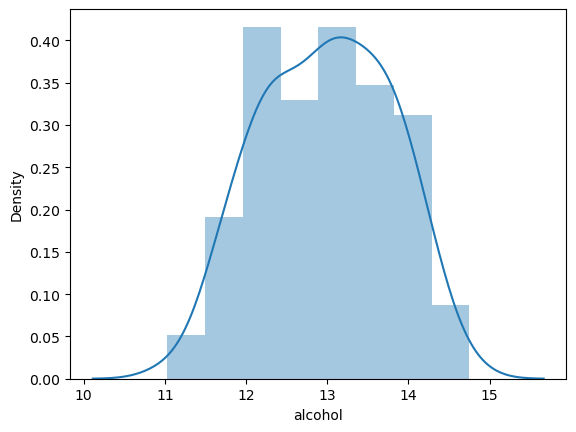

In [73]:
sns.distplot(X['alcohol'])

C:\Users\abhay\AppData\Local\Temp\ipykernel_4436\93177681.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_scaled['alcohol'])


<Axes: xlabel='alcohol', ylabel='Density'>

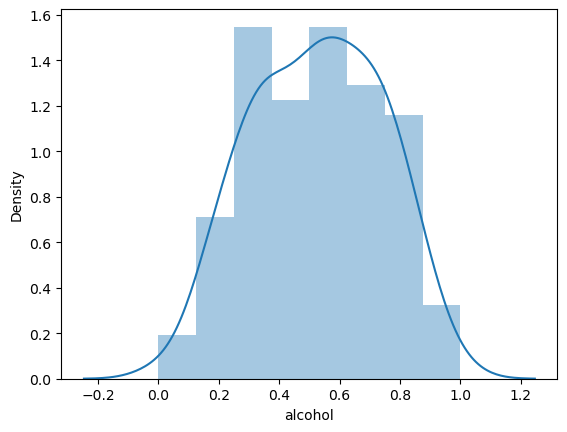

In [72]:
sns.distplot(X_scaled['alcohol'])  ## same plot before scaling and after scaling , no change in the plot..

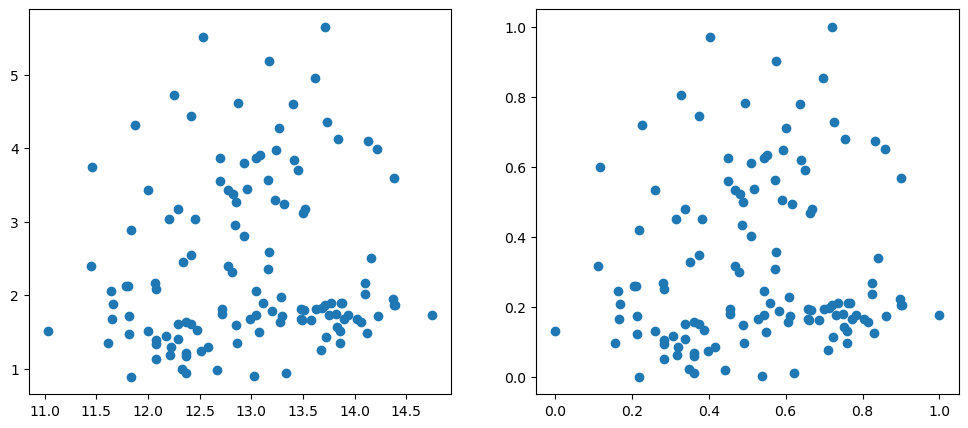

In [70]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))
ax1.scatter(X['alcohol'], X['malicacid'])
ax2.scatter(X_scaled['alcohol'], X_scaled['malicacid'])
## Both plots are same but all data points squish into the container of of area 0 to 1..
plt.show()